### Name : Rethinagiri G

In [1]:
import pandas as pd

rating= 'ratings.csv'
movies= 'movies.csv'
tags = 'tags.csv'
rating = pd.read_csv(rating)
print(rating.shape)

C:\Users\santh\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\santh\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\santh\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


(100836, 4)


In [2]:
user_ids = rating['userId'].nunique()
print(user_ids)


610


In [3]:
# Movie with the maximum number of user ratings

movies= pd.read_csv(movies)
merged = pd.merge(rating, movies, on='movieId')
movie_ratings = merged.groupby('title')['rating'].count()
max_rated_movie = movie_ratings.idxmax()

print( max_rated_movie)

Forrest Gump (1994)


In [5]:

tags= pd.read_csv(tags)
matrix_movie = movies[movies['title'] == 'Matrix, The (1999)']
merged_tags= pd.merge(tags, matrix_movie, on='movieId')
selected_tags = merged_tags['tag']

# Display the unique tags
unique_tags = selected_tags.unique()
print(unique_tags)

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [11]:
# Average user rating for 'Terminator 2: Judgment Day (1991)

terminator_movie = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']
merged= pd.merge(rating, terminator_movie, on='movieId')

# Calculate the average user rating
avg_rating = merged['rating'].mean()
print( avg_rating)

3.970982142857143


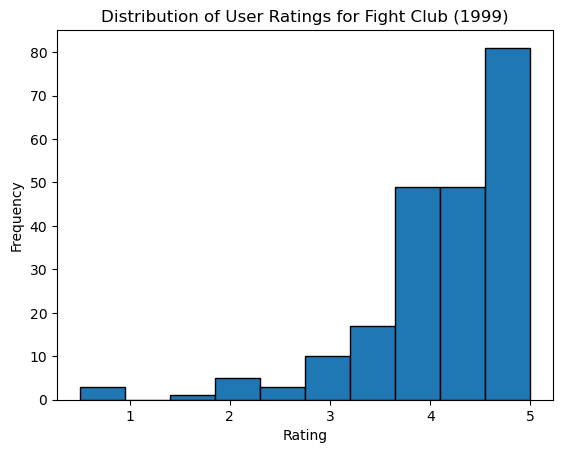

In [12]:
import matplotlib.pyplot as plt

fight_club_movie = movies[movies['title'] == 'Fight Club (1999)']

# Merge the ratings and movies DataFrames on 'movieId'
merged_ = pd.merge(rating, fight_club_movie, on='movieId')

# Plot a histogram of user ratings
plt.hist(merged_['rating'], bins=10, edgecolor='black')
plt.title('Distribution of User Ratings for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Most popular movie based on average user ratings

average_ratings = merged.groupby('title')['rating'].mean()
most_popular_movie = average_ratings.idxmax()

print( most_popular_movie)

Most popular movie based on average user ratings: Terminator 2: Judgment Day (1991)


In [15]:
# Most popular movie based on average user ratings (with more than 50 ratings)

grouped_ratings = rating.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

merge_ = pd.merge(movies, grouped_ratings, on='movieId', how='inner')
filtered_movies = merge_[merge_['count'] > 50]
most_popular_movie = filtered_movies.loc[filtered_movies['mean'].idxmax(), 'title']

print(most_popular_movie)

Most popular movie based on average user ratings (with more than 50 ratings): Shawshank Redemption, The (1994)


In [23]:
# Top 5 popular movies based on the number of user ratings

grouped_ratings = rating.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['count'] > 50]
sorted_movies = filtered_movies.sort_values(by='count', ascending=False)
top_5_movies = sorted_movies.head(5)


# Display the titles of the top 5 movies
print(top_5_movies['title'])




314                  Forrest Gump (1994)
277     Shawshank Redemption, The (1994)
257                  Pulp Fiction (1994)
510     Silence of the Lambs, The (1991)
1938                  Matrix, The (1999)
Name: title, dtype: object


In [20]:
# Third most popular Sci-Fi movie based on the number of user ratings

ratings = rating.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(movies, ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['count'] > 50]
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]
sorted_ = sci_fi_movies.sort_values(by='count', ascending=False)

# Step 6: Select the third most popular Sci-Fi movie
third_most_popular_sci_fi = sorted_.iloc[2]
print(third_most_popular_sci_fi['title'])

Jurassic Park (1993)


In [22]:
# MovieId of the movie with the highest average user rating

average_ratings = rating.groupby('movieId')['rating'].mean().reset_index()
highest_rated_movie_id = average_ratings.loc[average_ratings['rating'].idxmax(), 'movieId']

print(highest_rated_movie_id)


53


In [17]:
# MovieId of the Sci-Fi movie with the highest average user rating (IMDb)

grouped_ratings = rating.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]
sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['mean'].idxmax(), 'movieId']

print( sci_fi_movie)

3687
